In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
Phishing = pd.read_csv ("C:/Users/hp/Desktop/NEWDATA.csv")
Phishing.head(3)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0


In [20]:
X_train = Phishing.drop(columns = ['phishing'])
Y_train = Phishing[['phishing']]

In [21]:
y_train = pd.Series(Y_train['phishing'])
y_train

0       1
1       1
2       0
3       1
4       0
       ..
1623    1
1624    0
1625    1
1626    0
1627    1
Name: phishing, Length: 1628, dtype: int64

In [28]:
from zoofs import GreyWolfOptimization

In [120]:
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
# define your own objective function, make sure the function receives four parameters,
#  fit your model and return the objective value ! 
def objective_function_topass(model,X_train, y_train, X_valid, y_valid):      
    model.fit(X_train,y_train)  
    P=log_loss(y_valid,model.predict_proba(X_valid))
    return P
    
# create object of algorithm
algo_object=GreyWolfOptimization(objective_function_topass,n_iteration=4,
                                    population_size=100,minimize=True)


In [121]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
lgb_model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
algo_object.fit(lgb_model,X_train, y_train, X_train, y_train,verbose=True)
#plot your results

		 Best value of metric across iteration 	 Best value of metric across population  
Iteration 0 	 0.04543411023826909 					 0.04543411023826909 
Iteration 1 	 0.045492690318604506 					 0.04543411023826909 
Iteration 2 	 0.044793550771759186 					 0.044793550771759186 
Iteration 3 	 0.04521027200561031 					 0.044793550771759186 


['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_equal_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'qty_dot_domain',
 'qty_underline_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'qty_vowels_domain',
 'domain_in_ip',
 'server_client_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_exclamation_directory',
 'qty_tilde_directory',
 'qty_plus_directory',
 'qty_asterisk_directory',
 'qty_dollar_directory',
 'directory_length',
 'qty_dot_file',
 'qty_hyphen_file',
 'qty_slash_file',
 'qty_at_file',
 'qty_and_file',
 'qty_space_file',
 'qty_comma_file',
 'qty_plus_file',
 'qty_aste

# Plotting the Results

In [102]:
algo_object.plot_history()

In [103]:
print(algo_object.best_feature_list)

['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_dollar_directory', 'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_slash_file', 'qty_at_file', 'qty_and_file', 'q

In [104]:
Filtered_Dataset = pd.read_csv ("C:/Users/hp/Desktop/NEWDATA.csv")
Filtered_Dataset.head(3)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0


In [105]:
y_data = Filtered_Dataset['phishing']
X_data =  Filtered_Dataset[['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_dollar_directory', 'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_slash_file', 'qty_at_file', 'qty_and_file', 'qty_space_file', 'qty_comma_file', 'qty_plus_file', 'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file', 'qty_percent_file', 'file_length', 'qty_hyphen_params', 'qty_slash_params', 'qty_equal_params', 'qty_at_params', 'qty_and_params', 'qty_exclamation_params', 'qty_space_params', 'qty_tilde_params', 'qty_asterisk_params', 'qty_hashtag_params', 'qty_dollar_params', 'qty_percent_params', 'params_length', 'qty_params', 'asn_ip', 'time_domain_activation', 'qty_nameservers', 'ttl_hostname', 'tls_ssl_certificate', 'qty_redirects', 'url_google_index', 'domain_google_index']]

In [106]:
##We will use two machine learning algorithms to perform classification
#The first one is the random forest classifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [116]:
# Split into training and test set 
##In this cell, we use the random forest classifier to predict whether a link is phishing or not
X_train, X_test, y_train, y_test = train_test_split( 
             X_data, y_data, test_size = 0.3,random_state=5)

In [126]:
##In this cell, we use the random forest classifier to predict whether a link is phishing or not
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [127]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9529652351738241


In [128]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[316  18]
 [  5 150]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       334
           1       0.89      0.97      0.93       155

    accuracy                           0.95       489
   macro avg       0.94      0.96      0.95       489
weighted avg       0.96      0.95      0.95       489



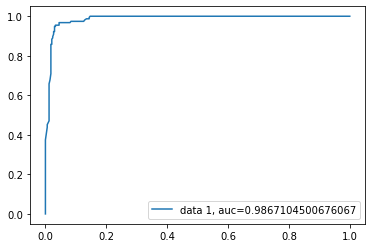

In [111]:
import matplotlib.pyplot as plt
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()